In [1]:
from __future__ import absolute_import, division, print_function

# Demographic study

## Preliminaries

The trip data set has a column for information on gender and age. This information is extremely sparse for 'Customer' type users (2% in 2016 and 0% in 2015). For the 'Subscriber'-type user the information is fairly complete (~99%).  

## Imports

In [2]:
import datetime
import os

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines

%matplotlib inline

## Data

In [3]:
data_dir = os.path.join(os.getcwd(),'..','..','data')

In [4]:
df_2015 = pd.read_csv(os.path.join(data_dir,'subscriber_age_histogram_2015.csv'))
df_2016 = pd.read_csv(os.path.join(data_dir,'subscriber_age_histogram_2016.csv'))

In [5]:
df_2015.head()

,age,c,num_males,num_females
0,17,4199,3430,769
1,18,13454,11133,2321
2,19,17430,13795,3628
3,20,31769,22943,8376
4,21,43858,34218,9640


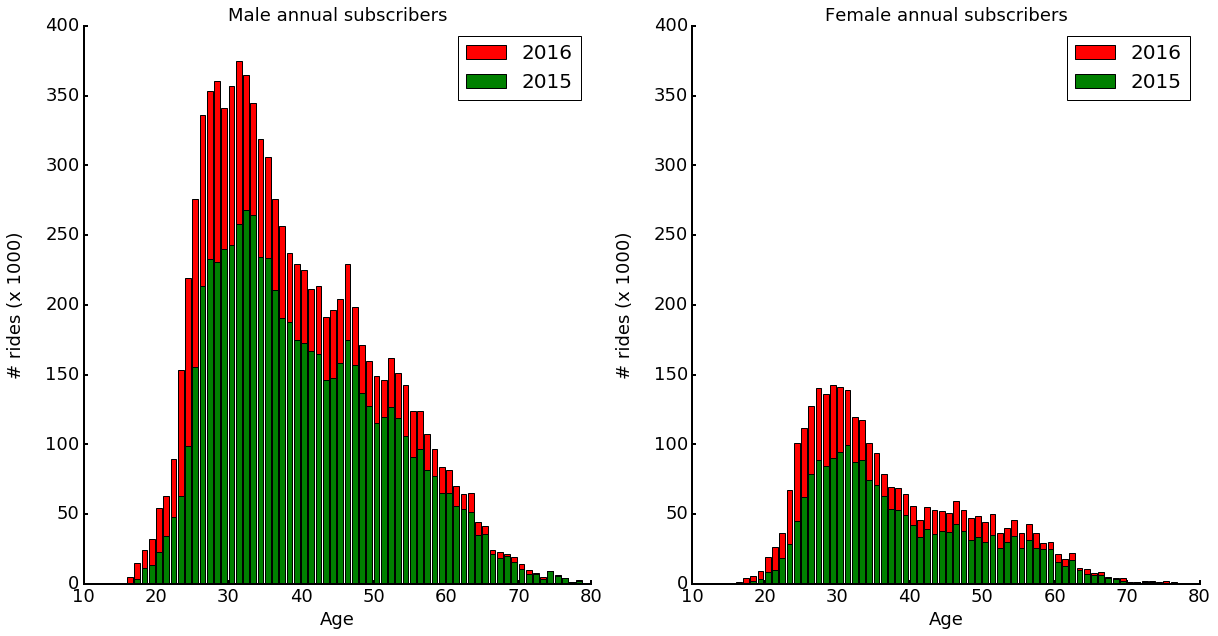

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20, 10))
# Male
age = (df_2015['age'][df_2015['age'] < 90],df_2016['age'][df_2016['age'] < 90])
male = (df_2015['num_males'][df_2015['age'] < 90],df_2016['num_males'][df_2016['age'] < 90])
# the width of the bars
width = 0.8       
rects1 = ax[0].bar(age[1], [x/1e3 for x in male[1]], width, color='r', label='2016')
rects1 = ax[0].bar(age[0], [x/1e3 for x in male[0]], width, color='g', label='2015')
ax[0].set_title('Male annual subscribers', fontsize=18)
ax[0].set_xlabel('Age', fontsize=18)
ax[0].set_ylabel('# rides (x 1000)', fontsize=18, labelpad=20)
ax[0].legend(prop={'size': 20})
# Hide the right and top spines
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
# Set witdh of axes spines and ticks
ax[0].spines['left'].set_linewidth(2)
ax[0].spines['bottom'].set_linewidth(2)
ax[0].xaxis.set_tick_params(width=2)
ax[0].yaxis.set_tick_params(width=2)
# Only show ticks on the left and bottom spines
ax[0].yaxis.set_ticks_position('left')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].tick_params(labelsize=18)
ax[0].set_xlim(10,80)
#
# Female
age = (df_2015['age'][df_2015['age'] < 90],df_2016['age'][df_2016['age'] < 90])
male = (df_2015['num_females'][df_2015['age'] < 90],df_2016['num_females'][df_2016['age'] < 90])
# the width of the bars
width = 0.8       
rects1 = ax[1].bar(age[1], [x/1e3 for x in male[1]], width, color='r', label='2016')
rects1 = ax[1].bar(age[0], [x/1e3 for x in male[0]], width, color='g', label='2015')
ax[1].set_title('Female annual subscribers', fontsize=18)
ax[1].set_xlabel('Age', fontsize=18)
ax[1].set_ylabel('# rides (x 1000)', fontsize=18, labelpad=20)
ax[1].legend(prop={'size': 20})
# Hide the right and top spines
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
# Set witdh of axes spines and ticks
ax[1].spines['left'].set_linewidth(2)
ax[1].spines['bottom'].set_linewidth(2)
ax[1].xaxis.set_tick_params(width=2)
ax[1].yaxis.set_tick_params(width=2)
# Only show ticks on the left and bottom spines
ax[1].yaxis.set_ticks_position('left')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].tick_params(labelsize=18)
ax[1].set_xlim(10,80)
ax[1].set_ylim(0,400)
#
plt.savefig(os.path.join(data_dir,'plots','subscriber_demographics_2015_2016.pdf'), bbox_inches='tight')


## Compare new data with original data

Reacreate histogram shown at https://cloud.google.com/blog/big-data/2016/12/analyzing-nyc-biking-data-with-google-bigquery 

In [153]:
df_tmp = pd.read_csv(os.path.join(data_dir,'gender_age_histogram.csv'))

In [154]:
df_tmp.head()

,age,c,num_males,num_females
0,31,1311169,948942,359984
1,32,1275647,951459,321949
2,33,1261772,942443,317718
3,30,1249087,892019,356424
4,29,1194270,858725,335029


(10, 80)

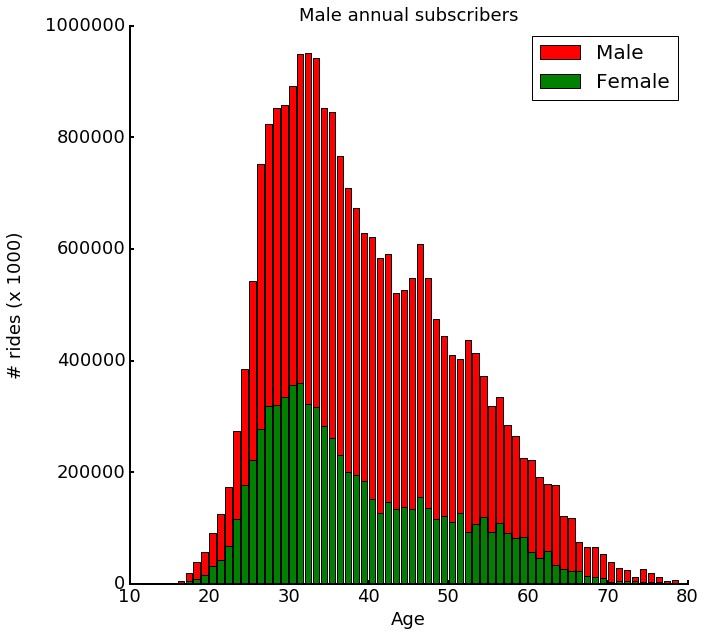

In [157]:
fig, ax = plt.subplots(figsize=(10, 10))
# Male
age = df_tmp['age'][df_tmp['age'] < 90]
male = df_tmp['num_males'][df_tmp['age'] < 90]
female = df_tmp['num_females'][df_tmp['age'] < 90]
# the width of the bars
width = 0.8       
rects1 = ax.bar(age, male, width, color='r', label='Male')
rects1 = ax.bar(age, female, width, color='g', label='Female')
ax.set_title('Male annual subscribers', fontsize=18)
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('# rides (x 1000)', fontsize=18, labelpad=20)
ax.legend(prop={'size': 20})
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Set witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(labelsize=18)
ax.set_xlim(10,80)
#



This looks quite different from the plot on the website linked above.

In [158]:
df_tmp = pd.read_csv(os.path.join(data_dir,'gender_age_histogram_google.csv'))

In [162]:
df_tmp.head()

,age,c,num_males,num_females
0,31,1240336,898453,340179
1,32,1215430,907695,306279
2,33,1207236,903267,302756
3,30,1176419,841542,334341
4,29,1122408,809837,312188


(10, 80)

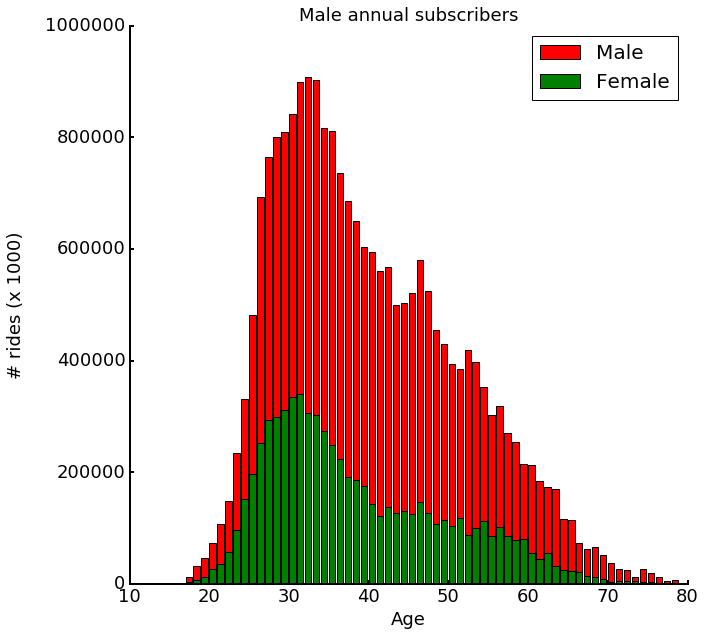

In [160]:
fig, ax = plt.subplots(figsize=(10, 10))
# Male
age = df_tmp['age'][df_tmp['age'] < 90]
male = df_tmp['num_males'][df_tmp['age'] < 90]
female = df_tmp['num_females'][df_tmp['age'] < 90]
# the width of the bars
width = 0.8       
rects1 = ax.bar(age, male, width, color='r', label='Male')
rects1 = ax.bar(age, female, width, color='g', label='Female')
ax.set_title('Male annual subscribers', fontsize=18)
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('# rides (x 1000)', fontsize=18, labelpad=20)
ax.legend(prop={'size': 20})
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Set witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(labelsize=18)
ax.set_xlim(10,80)
#

Even with the data taken from the google bigquery site it looks very different.

In [163]:
# Now let's try the original data from
# https://exploratory.io/viz/7285328289418862/2952058795271396?cb=1478111542984

In [164]:
df_tmp = pd.read_csv(os.path.join(data_dir,'gender_age_histogram_source.csv'))

(10, 80)

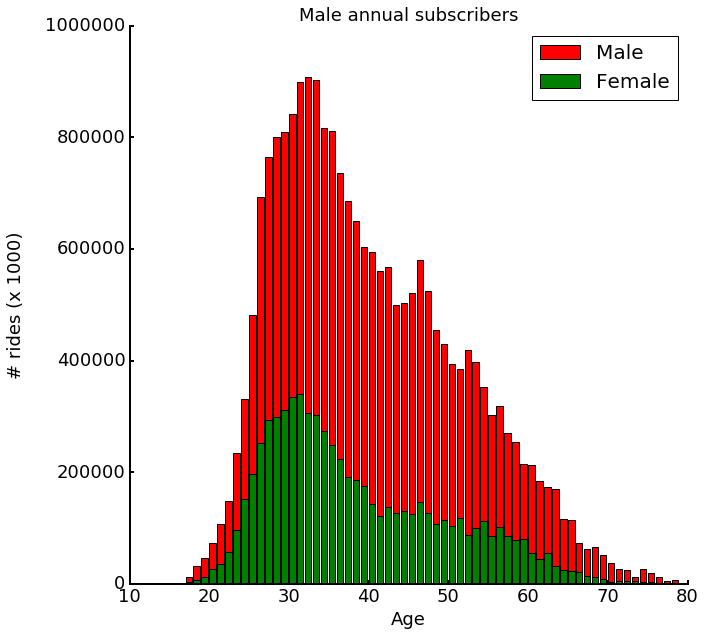

In [165]:
fig, ax = plt.subplots(figsize=(10, 10))
# Male
age = df_tmp['age'][df_tmp['age'] < 90]
male = df_tmp['num_males'][df_tmp['age'] < 90]
female = df_tmp['num_females'][df_tmp['age'] < 90]
# the width of the bars
width = 0.8       
rects1 = ax.bar(age, male, width, color='r', label='Male')
rects1 = ax.bar(age, female, width, color='g', label='Female')
ax.set_title('Male annual subscribers', fontsize=18)
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('# rides (x 1000)', fontsize=18, labelpad=20)
ax.legend(prop={'size': 20})
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Set witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(labelsize=18)
ax.set_xlim(10,80)
#

Still very different. I don't know how they managed to create a histogram that showed such a higher fraction of females than males. In the original plot they even show female rides *higher* than male rides.

Exploring the entries in the bars in the intercative plot on the exploratory.io webite shows that male riders have been downscaled behind the scenes to create the original histogram! That's were the discrepancy in the appearance comes from.

## Determine percentage growth per age bin for male and femal customers

In [140]:
condition = (df_2015['age'] > 20) & (df_2015['age'] < 70)
age_2015 = df_2015['age'][condition].tolist()
ratio_male = []
ratio_male_err = []
for tmp_age in age_2015:
    tmp_num_2015 = df_2015['num_males'][df_2015['age'] == tmp_age].iloc[0]
    tmp_num_2016 = df_2016['num_males'][df_2016['age'] == tmp_age].iloc[0]
    tmp_diff = (tmp_num_2016-tmp_num_2015)
    tmp_denom = tmp_num_2015
    tmp = (tmp_diff / tmp_denom)
    ratio_male.append(tmp*100)
    # Assume Poisson error and propagate
    tmp_err_1 = np.sqrt(tmp_num_2015)
    tmp_err_2 = np.sqrt(tmp_num_2016)
    tmp_diff_err = np.sqrt((tmp_err_1)**2 + (tmp_err_2)**2)
    tmp_err = np.sqrt((tmp_diff_err/tmp_diff)**2 + (tmp_err_1/tmp_denom)**2)
    ratio_male_err.append(tmp_err*tmp*100)
ratio_female = []
ratio_female_err = []
for tmp_age in age_2015:
    tmp_num_2015 = df_2015['num_females'][df_2015['age'] == tmp_age].iloc[0]
    tmp_num_2016 = df_2016['num_females'][df_2016['age'] == tmp_age].iloc[0]
    tmp_diff = (tmp_num_2016-tmp_num_2015)
    tmp_denom = tmp_num_2015
    tmp = (tmp_diff / tmp_denom)
    ratio_female.append(tmp*100)
    # Assume Poisson error and propagate
    tmp_err_1 = np.sqrt(tmp_num_2015)
    tmp_err_2 = np.sqrt(tmp_num_2016)
    tmp_diff_err = np.sqrt((tmp_err_1)**2 + (tmp_err_2)**2)
    tmp_err = np.sqrt((tmp_diff_err/tmp_diff)**2 + (tmp_err_1/tmp_denom)**2)
    ratio_female_err.append(tmp_err*tmp*100)


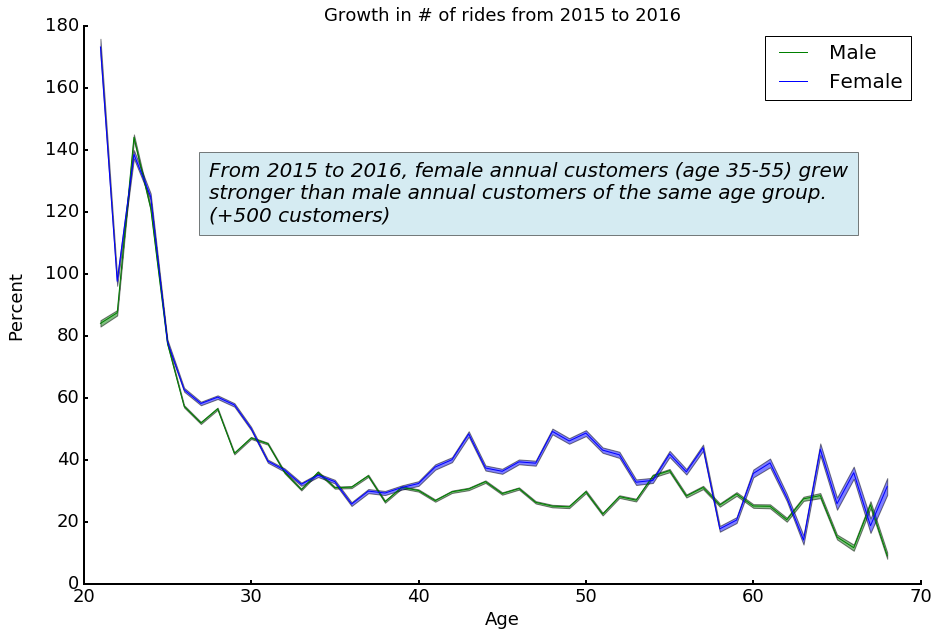

In [147]:
fig, ax = plt.subplots(figsize=(15, 10))
#
skip_begin = 0
skip_end = 1
tmp_x = age_2015[skip_begin:-skip_end]
tmp_y_male = ratio_male[skip_begin:-skip_end]
tmp_y_male_err = ratio_male_err[skip_begin:-skip_end]
tmp_y_female = ratio_female[skip_begin:-skip_end]
tmp_y_female_err = ratio_female_err[skip_begin:-skip_end]
#
plt.plot(tmp_x,tmp_y_male, color='green', label='Male', lw=1)
plt.plot(tmp_x,tmp_y_female, color='blue', label='Female', lw=1)
plt.title('Growth in # of rides from 2015 to 2016', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Percent', fontsize=18, labelpad=20)
plt.legend(prop={'size': 20})
# Show error margins
tmp_lower = [x-y for x,y in zip(tmp_y_male,tmp_y_male_err)]
tmp_upper = [x+y for x,y in zip(tmp_y_male,tmp_y_male_err)]
ax.fill_between(tmp_x, tmp_upper, tmp_lower, facecolor='green', alpha=.5,)
# Show error margins
tmp_lower = [x-y for x,y in zip(tmp_y_female,tmp_y_female_err)]
tmp_upper = [x+y for x,y in zip(tmp_y_female,tmp_y_female_err)]
ax.fill_between(tmp_x, tmp_upper, tmp_lower, facecolor='blue', alpha=.5,)
#
# ax.set_ylim(20,40)
# ax.set_xlim(20,40)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Set witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(labelsize=18)
# 
ax.text(0.15, 0.65, 'From 2015 to 2016, female annual customers (age 35-55) grew\nstronger than male annual customers of the same age group.\n(+500 customers)', style='italic',
        horizontalalignment='left', bbox={'facecolor':'lightblue', 'alpha':0.5, 'pad':10},
        transform=ax.transAxes,fontsize=20)
#
plt.savefig(os.path.join(data_dir,'plots','growth_subscriber_demographics_2015_2016.pdf'), bbox_inches='tight')
#


## Determine extra growth in female customers 2015 -> 2016 at ages 35-55

In [146]:
age1 = 35
age2 = 55
# find the aggregated number of rides per gender in the age bracket
n_female_2015 = df_2015['num_females'][(df_2015['age'] >= age1) & (df_2015['age'] <= age2)].sum()
n_female_2016 = df_2016['num_females'][(df_2016['age'] >= age1) & (df_2016['age'] <= age2)].sum()
n_male_2015 = df_2015['num_males'][(df_2015['age'] >= age1) & (df_2015['age'] <= age2)].sum()
n_male_2016 = df_2016['num_males'][(df_2016['age'] >= age1) & (df_2016['age'] <= age2)].sum()
print(n_male_2015, n_female_2015)
print(n_male_2016, n_female_2016)
# If female customers had grown at the same rate as the males, what would have been the number of female customers?
growth_ratio_male = n_male_2016/n_male_2015
growth_ratio_female = n_female_2016/n_female_2015
print('Growth ratios:', growth_ratio_male, growth_ratio_female)
print('Growth percetages:', 100*(n_male_2016-n_male_2015)/n_male_2015, 100*(n_female_2016-n_female_2015)/n_female_2015)

print(100*(growth_ratio_female-growth_ratio_male)/growth_ratio_male)
n_female_2016_hypo = int(round(growth_ratio_male*n_female_2015))
print(n_female_2016_hypo, n_female_2016)
diff = n_female_2016-n_female_2016_hypo
print('Difference in # rides: {}'.format(diff))
print('Difference in # of customers (assuming 112 rides per customer per year): {}'.format((diff)/112))

3226651 841152
4180163 1149089
Growth ratios: 1.29551135217 1.36608960093
Growth percetages: 29.5511352173 36.6089600928
5.44790662289
1089722 1149089
Difference in # rides: 59367
Difference in # of customers (assuming 112 rides per customer per year): 530.0625


## Compare age group usage for male and femal customers

In [109]:
age_2015 = df_2015['age'][df_2015['age'] < 70]
ratio_2015 = (df_2015['num_males'][df_2015['age'] < 70] / df_2015['num_females'][df_2015['age'] < 70]).tolist()
tmp_ratio_2015_err = (((df_2015['num_males'][df_2015['age'] < 70].apply(np.sqrt) / 
                        df_2015['num_males'][df_2015['age'] < 70]).apply(lambda x: x**2) +
                       (df_2015['num_females'][df_2015['age'] < 70].apply(np.sqrt) / 
                        df_2015['num_females'][df_2015['age'] < 70]).apply(lambda x: x**2)).apply(np.sqrt)).tolist()
ratio_2015_err = [x*y for x,y in zip(ratio_2015,tmp_ratio_2015_err)]
#
age_2016 = df_2016['age'][df_2016['age'] < 70]
ratio_2016 = (df_2016['num_males'][df_2016['age'] < 70] / df_2016['num_females'][df_2016['age'] < 70]).tolist()
tmp_ratio_2016_err = (((df_2016['num_males'][df_2016['age'] < 70].apply(np.sqrt) / 
                        df_2016['num_males'][df_2016['age'] < 70]).apply(lambda x: x**2) +
                       (df_2016['num_females'][df_2016['age'] < 70].apply(np.sqrt) / 
                        df_2016['num_females'][df_2016['age'] < 70]).apply(lambda x: x**2)).apply(np.sqrt)).tolist()
ratio_2016_err = [x*y for x,y in zip(ratio_2016,tmp_ratio_2016_err)]




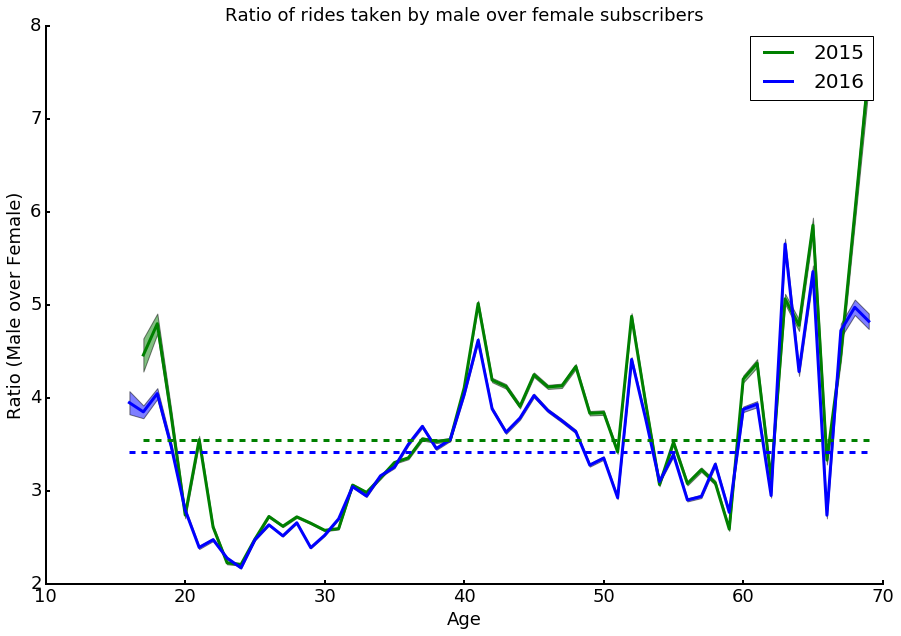

In [110]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(age_2015,ratio_2015, color='green', label='2015', lw=3)
plt.plot(age_2016,ratio_2016, color='blue', label='2016', lw=3)
plt.title('Ratio of rides taken by male over female subscribers', fontsize=18)
plt.ylabel('Ratio (Male over Female)', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.legend(prop={'size': 20})
#
plt.plot([age_2015.iloc[0],age_2015.iloc[-1]],[np.median(ratio_2015),np.median(ratio_2015)],'g--', lw=3)
plt.plot([age_2016.iloc[0],age_2016.iloc[-1]],[np.median(ratio_2016),np.median(ratio_2016)],'b--', lw=3)
# Show error margins
tmp_lower = [x-y for x,y in zip(ratio_2015,ratio_2015_err)]
tmp_upper = [x+y for x,y in zip(ratio_2015,ratio_2015_err)]
ax.fill_between(age_2015, tmp_upper, tmp_lower, facecolor='green', alpha=.5,)
# Show error margins
tmp_lower = [x-y for x,y in zip(ratio_2016,ratio_2016_err)]
tmp_upper = [x+y for x,y in zip(ratio_2016,ratio_2016_err)]
ax.fill_between(age_2016, tmp_upper, tmp_lower, facecolor='blue', alpha=.5,)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Set witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(labelsize=18)
#
plt.savefig(os.path.join(data_dir,'plots','ride_ratio_subscriber_demographics_2015_2016.pdf'), bbox_inches='tight')


## Determine gain in number of female subscribers (and revenue) in specific age bracket

In [111]:
# age bracket 20-35
age1 = 20
age2 = 35
tmp_median_ratio = []
for idx,age in enumerate(age_2016):
    if age >= age1 and age < age2:
        tmp_median_ratio.append(ratio_2016[idx])
median_ratio = np.median(tmp_median_ratio)
print('Median ratio (2016, 20-35):', median_ratio)

# age bracket 35-55
age1 = 35
age2 = 55
tmp_median_ratio = []
for idx,age in enumerate(age_2016):
    if age >= age1 and age <= age2:
        tmp_median_ratio.append(ratio_2016[idx])
median_ratio = np.median(tmp_median_ratio)
print('Median ratio (2016, 35-55):', median_ratio)
        


Median ratio (2016, 20-35): 2.52258260722
Median ratio (2016, 35-55): 3.6364735837


In 2016, the average subscriber took a total of 112 rides a year (see citibike_02.ipynb for the calculation).

In [152]:
# Calculate the amount of extra female subscribers we need to lower the 35-55 median ratio to 3.0 or 2.5
age1 = 35
age2 = 55
n_males_in_age_bracket = df_2016['num_males'][(df_2016['age'] >= age1) & (df_2016['age'] <= age2)].sum()
n_females_in_age_bracket = df_2016['num_females'][(df_2016['age'] >= age1) & (df_2016['age'] <= age2)].sum()
target_ratios = [2.5,3.0]
for target_ratio in target_ratios:
    factor = n_males_in_age_bracket/(target_ratio*n_females_in_age_bracket)
    total_female_after = int(factor*n_females_in_age_bracket)
    new_female_rides = int(factor*n_females_in_age_bracket)- n_females_in_age_bracket
    new_female_cust = int(new_female_rides / 112.)
    new_revenue = new_female_cust * 163
    print('To reach a male/female rides ratio of {} in the age group from {} to {} years,'.format(target_ratio,age1,age2))
    print('Citibike needs to acquire {} new female annual customers in that age group'.format(new_female_cust))
    print('for a total increase in revenue of {} USD.'.format(new_revenue))
    print('-----------------')


To reach a male/female rides ratio of 2.5 in the age group from 35 to 55 years,
Citibike needs to acquire 4669 new female annual customers in that age group
for a total increase in revenue of 761047 USD.
-----------------
To reach a male/female rides ratio of 3.0 in the age group from 35 to 55 years,
Citibike needs to acquire 2181 new female annual customers in that age group
for a total increase in revenue of 355503 USD.
-----------------


In [148]:
df_2015_add = df_2015.copy()
df_2016_add = df_2016.copy()
n_add = [2181,4669]
for i in range(n_add[1]):
    tmp_age = np.random.randint(age1, age2+1)
    tmp_idx = df_2016_add[df_2016_add['age'] == tmp_age].index[0]
    curr_val = df_2016_add['num_females'][df_2016_add['age'] == tmp_age].iloc[0]
    new_val = curr_val + 112 # 112 rides per customer 
    df_2016_add.set_value(tmp_idx,'num_females',new_val)


    
age_2015 = df_2015['age'][df_2015['age'] < 70]
ratio_2015 = (df_2015['num_males'][df_2015['age'] < 70] / df_2015['num_females'][df_2015['age'] < 70]).tolist()
#
age_2016 = df_2016_add['age'][df_2016_add['age'] < 70]
ratio_2016_add = (df_2016_add['num_males'][df_2016_add['age'] < 70] / df_2016_add['num_females'][df_2016_add['age'] < 70]).tolist()


In [149]:
df_2016[(df_2016['age'] >= 35) & (df_2016['age'] <= 55)]

,age,c,num_males,num_females
19,35,401271,305997,93997
20,36,357024,276098,78869
21,37,326659,256653,69494
22,38,306584,236969,68596
23,39,295412,229513,64635
24,40,281729,224823,55665
25,41,258733,211484,45780
26,42,269805,213688,55055
27,43,243949,191122,52656
28,44,249620,196372,51913


In [150]:
df_2016_add[(df_2016_add['age'] >= 35) & (df_2016_add['age'] <= 55)]

,age,c,num_males,num_females
19,35,401271,305997,118077
20,36,357024,276098,105637
21,37,326659,256653,91782
22,38,306584,236969,95252
23,39,295412,229513,89387
24,40,281729,224823,79633
25,41,258733,211484,69972
26,42,269805,213688,79023
27,43,243949,191122,76624
28,44,249620,196372,75209


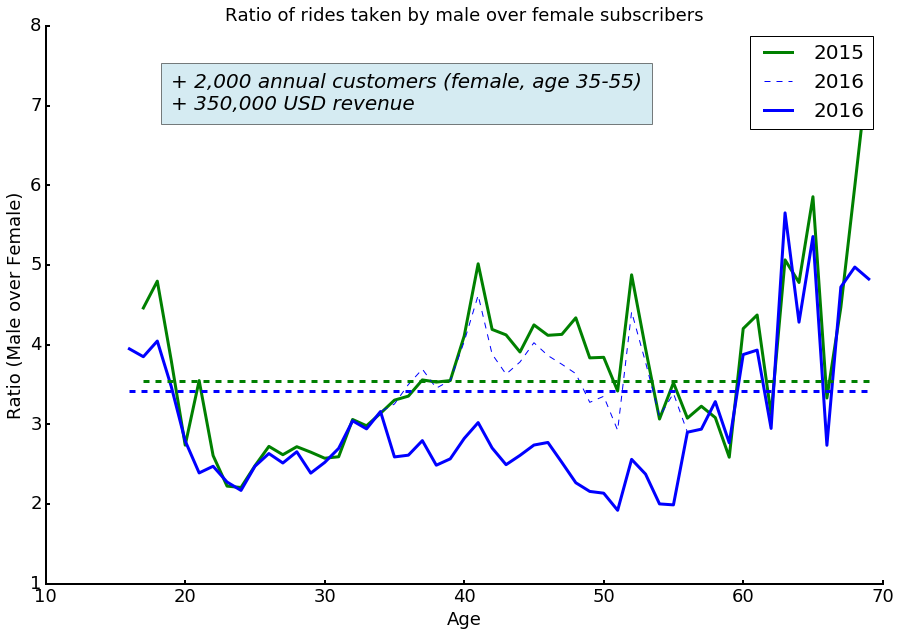

In [151]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(age_2015,ratio_2015, color='green', label='2015', lw=3)
plt.plot(age_2016,ratio_2016, color='blue', label='2016', lw=1, linestyle='--')
plt.plot(age_2016,ratio_2016_add, color='blue', label='2016', lw=3)
plt.title('Ratio of rides taken by male over female subscribers', fontsize=18)
plt.ylabel('Ratio (Male over Female)', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.legend(prop={'size': 20})
#
plt.plot([age_2015.iloc[0],age_2015.iloc[-1]],[np.median(ratio_2015),np.median(ratio_2015)],'g--', lw=3)
plt.plot([age_2016.iloc[0],age_2016.iloc[-1]],[np.median(ratio_2016),np.median(ratio_2016)],'b--', lw=3)
# # Show error margins
# tmp_lower = [x-y for x,y in zip(ratio_2015,ratio_2015_err)]
# tmp_upper = [x+y for x,y in zip(ratio_2015,ratio_2015_err)]
# ax.fill_between(age_2015, tmp_upper, tmp_lower, facecolor='green', alpha=.5,)
# # Show error margins
# tmp_lower = [x-y for x,y in zip(ratio_2016,ratio_2016_err)]
# tmp_upper = [x+y for x,y in zip(ratio_2016,ratio_2016_err)]
# ax.fill_between(age_2016, tmp_upper, tmp_lower, facecolor='blue', alpha=.5,)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Set witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(labelsize=18)
#
# plt.savefig(os.path.join(data_dir,'plots','ride_ratio_subscriber_demographics_2015_2016.pdf'), bbox_inches='tight')
#
ax.text(0.15, 0.85, '+ 2,000 annual customers (female, age 35-55)\n+ 350,000 USD revenue', style='italic',
        horizontalalignment='left', bbox={'facecolor':'lightblue', 'alpha':0.5, 'pad':10},
        transform=ax.transAxes,fontsize=20)


